# K-Means Clustering from Scratch
The purpose of this script is to perform K-Means clustering from scratch using the Euclidean distance.

In [1]:
# Create Dataframe.
size = 10
df = data.frame(obs  = seq(1,size),
                  x1 = runif(size, 1, 5.9),
                  x2 = runif(size, 1, 5.9)
                  )
head(df)

obs,x1,x2
1,4.858897,1.968298
2,2.113971,1.401783
3,3.556339,3.351848
4,5.596669,2.349453
5,3.067055,3.831192
6,2.813690,2.392194


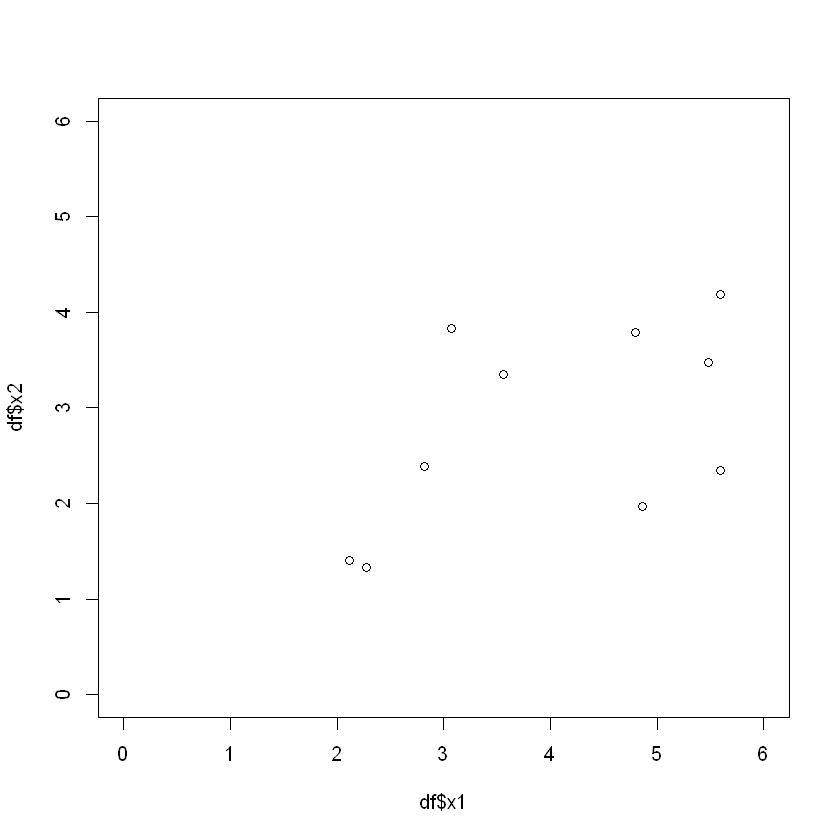

In [2]:
plot(df$x1, df$x2,
           xlim = c(0,6), ylim = c(0,6))

In [3]:
# Assign clusters to random spots. 
cluster1 = c(1,2)
cluster2 = c(3,4)
random_centroids = array(c(1,2,3,4), dim = c(2,2))
random_centroids

1,3
2,4


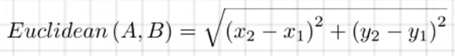

In [4]:
# A function to find Eclidean Distance. Pass dataframe, first variable vector, second variable vector, and the cluster point.
euclidean_distance = function(dataframe, x1, x2, cluster){
    x1_c1_d = (dataframe$x1 - cluster[1])^2
    x2_c1_d = (dataframe$x2 - cluster[1])^2
    c1_e_d = sqrt(x1_c1_d + x2_c1_d)
    return(c1_e_d)
}

# Test euclidean_distance calculator.
total_distance = array(c(euclidean_distance(df, x1, x2, cluster1), euclidean_distance(df, x1, x2, cluster2)), dim = c(size, 2))
head(total_distance)

3.978528,2.1260068
1.184213,1.8273875
3.473623,0.6582625
4.790656,2.6769197
3.505476,0.8338921
2.286411,0.6357196


In [5]:
# Assign blue to cluster 1 and green to cluster 2.
df$cluster_color =  ifelse(c(total_distance[,1] <= total_distance[,2]), 'blue', 'green')
head(df$cluster_color)

[1] "green" "blue"  "green" "green" "green" "green"

In [6]:
df[,3][c(total_distance[,1] <= total_distance[,2])]

[1] 1.401783 1.329674

In [7]:
# Start with random centroids then do the first iteration K-means clustering. 
new_centroids = random_centroids
c1_2x = c(mean(df[,2][c(total_distance[,1] <= total_distance[,2])]), mean(df[,3][c(total_distance[,1] <= total_distance[,2])]))
c1_2y = c(mean(df[,2][!c(total_distance[,1] <= total_distance[,2])]), mean(df[,3][!c(total_distance[,1] <=total_distance[,2])]))
new_centroids[1,] = c1_2x
new_centroids[2,] = c1_2y
new_centroids

2.193979,1.365728
4.471303,3.168238


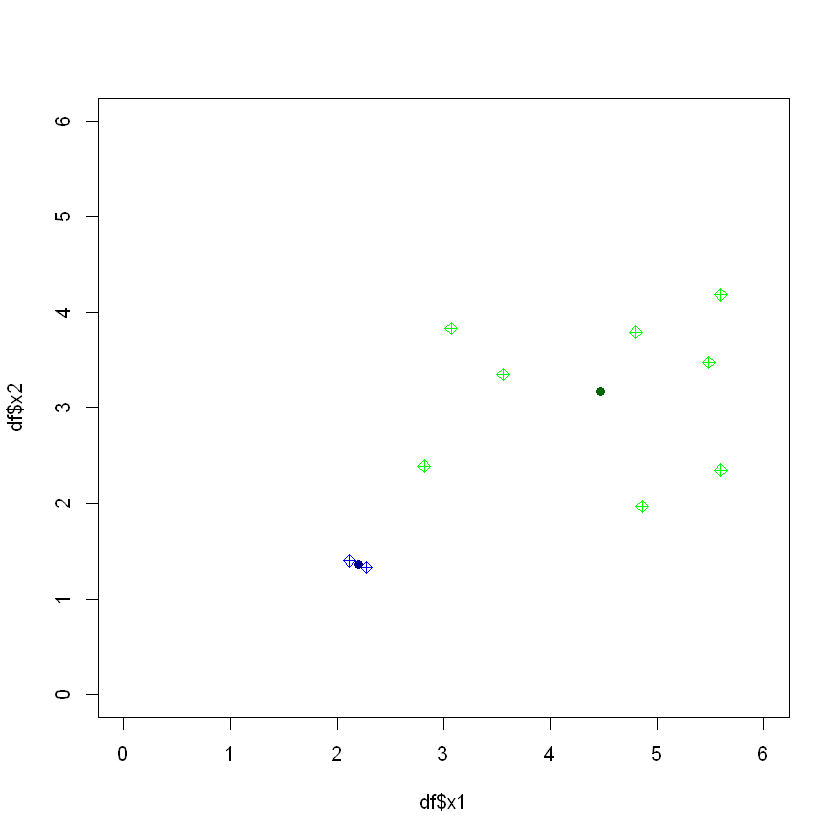

In [8]:
# Plot Points
plot(df$x1, df$x2,col = df$cluster_color, pch = 9,
           xlim = c(0,6), ylim = c(0,6))
# Plot Centroid.
points(new_centroids[,1], new_centroids[,2], col=c("dark blue", 'dark green'), pch = 19)

2.400549,1.707884
4.708105,3.279102


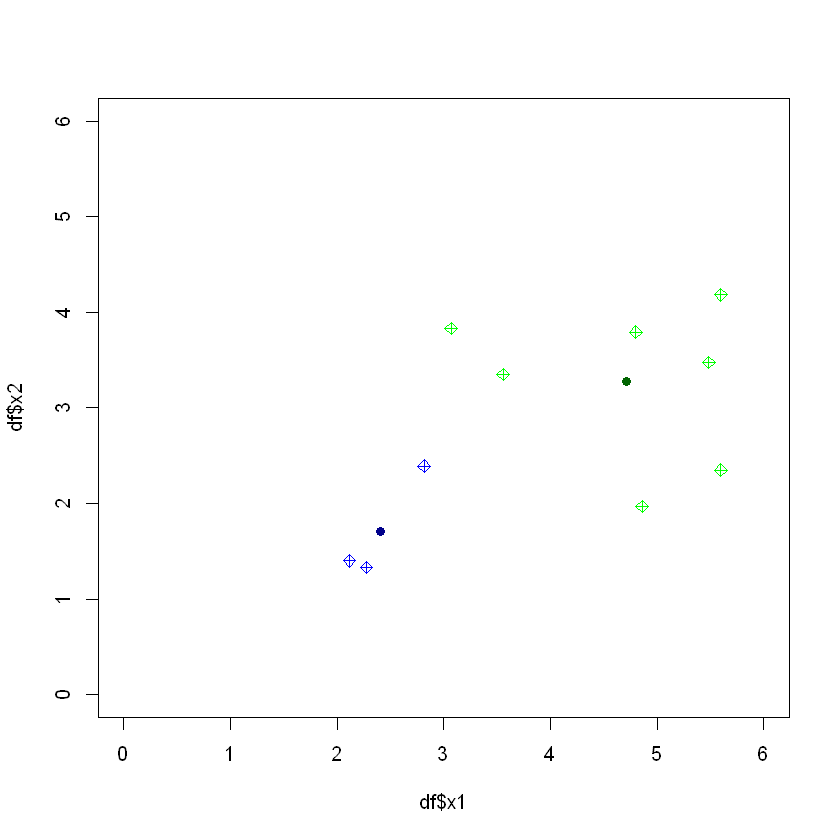

In [9]:
kmeans_1_iteration = function(df, x1, x2, new_centroids){
    # Compute distances from clusters to each point using euclidean_distance. 
    total_distance = array(c(euclidean_distance(df, x1, x2, new_centroids[1,]), euclidean_distance(df, x1, x2, new_centroids[2,])), dim = c(size, 2))
    # Assign colors based on what cluster each point belongs to.
    df$cluster_color =  ifelse(c(total_distance[,1] <= total_distance[,2]), 'blue', 'green')
    c_x1 = c(mean(df[,3][c(total_distance[,1] <= total_distance[,2])]), mean(df[,2][c(total_distance[,1] <= total_distance[,2])]))
    c_x2 = c(mean(df[,3][!c(total_distance[,1] <= total_distance[,2])]), mean(df[,2][!c(total_distance[,1] <=total_distance[,2])]))
    new_centroids[1,] = rev(c_x1)
    new_centroids[2,] = rev(c_x2)
    # Plot Points
    plot(df$x1, df$x2, col = df$cluster_color, pch = 9,
           xlim = c(0,6), ylim = c(0,6))
    # Plot Centroid.
    points( new_centroids, col=c("dark blue", 'dark green'), pch = 19)
    return(new_centroids)
}

kmeans_1_iteration(df, x1, x2, new_centroids)